In [1]:
from datetime import datetime, timedelta, date
import pandas as pd
from constants import *
from download import query_phe as query, download_phe as download, find_latest
from phe import plot_summary, read_csv, load_population, vaccination_dashboard

In [22]:
release=None

In [23]:
overview_data = query(
    filters={area_type: overview},
    structure=[release_timestamp, date_col, area_name, area_code,
               new_cases_by_specimen_date, new_admissions, new_deaths_by_death_date,
               new_virus_tests]
)
overview_data

,releaseTimestamp,date,areaName,areaCode,newCasesBySpecimenDate,newAdmissions,newDeaths28DaysByDeathDate,newVirusTests
0,2021-01-05,2021-01-04,United Kingdom,K02000001,6945,NaN,149.0,464611.0
1,2021-01-05,2021-01-03,United Kingdom,K02000001,33496,NaN,329.0,428770.0
2,2021-01-05,2021-01-02,United Kingdom,K02000001,53478,NaN,406.0,411523.0
3,2021-01-05,2021-01-01,United Kingdom,K02000001,30448,NaN,399.0,422804.0
4,2021-01-05,2020-12-31,United Kingdom,K02000001,48007,NaN,479.0,482473.0
...,...,...,...,...,...,...,...,...
355,2021-01-05,2020-01-15,United Kingdom,K02000001,0,NaN,NaN,NaN
356,2021-01-05,2020-01-14,United Kingdom,K02000001,0,NaN,NaN,NaN
357,2021-01-05,2020-01-13,United Kingdom,K02000001,0,NaN,NaN,NaN
358,2021-01-05,2020-01-12,United Kingdom,K02000001,0,NaN,NaN,NaN


In [24]:
download('england', 'nation', new_admissions_sum, new_cases_sum, new_deaths_sum, unique_people_tested_sum, area_name='England', release=release)

PosixPath('/Users/chris/coronavirus/data/england_2021-01-05.csv')

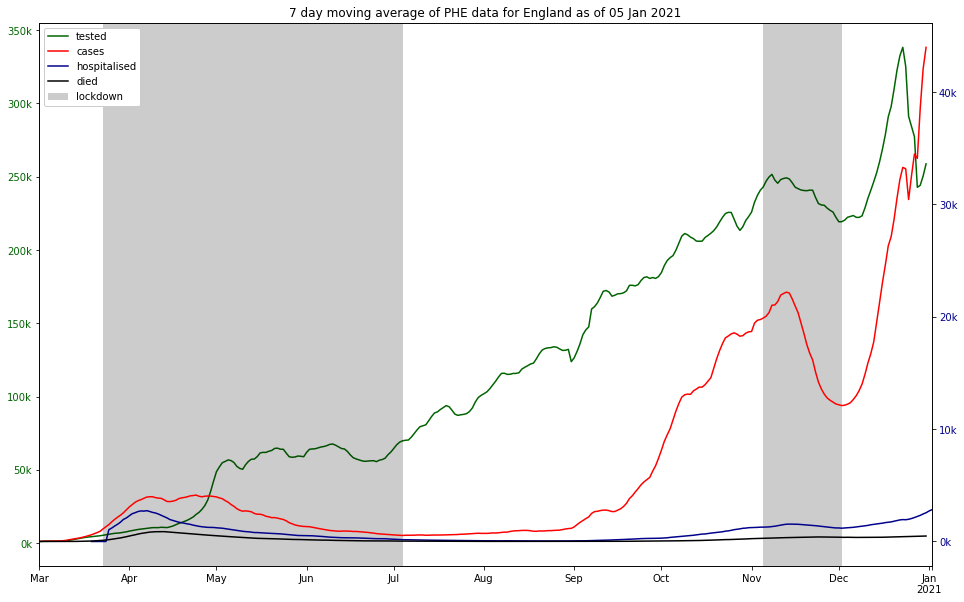

In [25]:
plot_summary(earliest_date='2020-03-01', tested_formatter=lambda y, pos: f"{y / 1_000:,.0f}k")

In [26]:
download('vaccination', 'nation', first_dose, second_dose, first_dose_cum, second_dose_cum, release=release)

PosixPath('/Users/chris/coronavirus/data/vaccination_2021-01-05.csv')

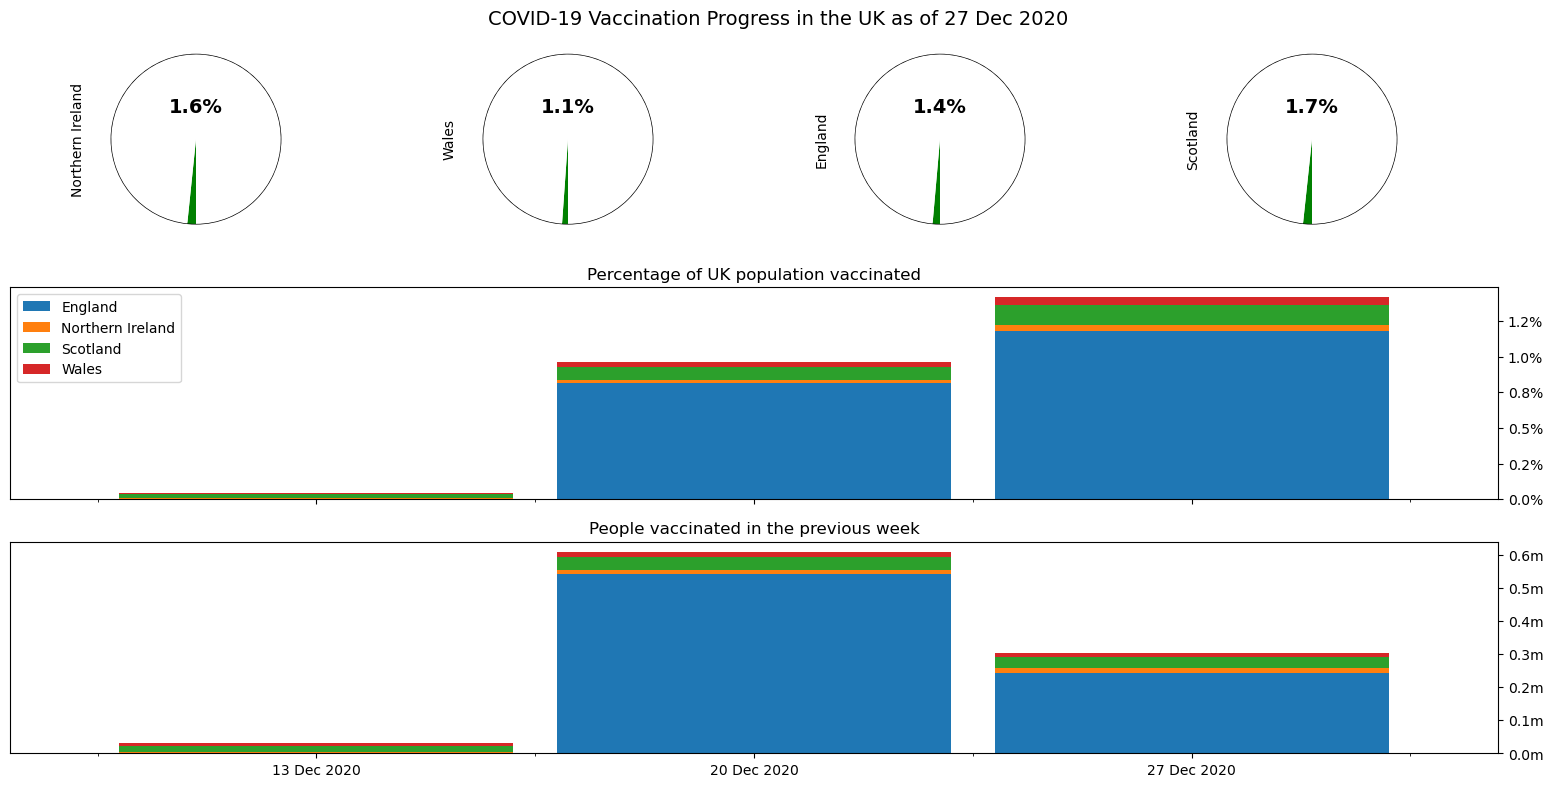

In [27]:
vaccination_dashboard()

In [28]:
download(nation, nation, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/nation_2021-01-05.csv')

In [29]:
download(region, region, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/region_2021-01-05.csv')

In [30]:
download(ltla, ltla, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/ltla_2021-01-05.csv')

In [31]:
download(msoa, msoa, new_cases_sum, new_cases_rate, new_cases_change, release=release)

PosixPath('/Users/chris/coronavirus/data/msoa_2021-01-05.csv')